In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
import pandas as pd

df = pd.read_csv("winequality-red.csv", sep=None, engine='python')

print("✅ Dataset loaded successfully. Here's the first 5 rows:\n")
print(df.head())

print("\n--- Columns Detected ---")
print(df.columns.tolist())

if 'quality' in df.columns:
    print("\n--- Quality Score Distribution ---")
    print(df['quality'].value_counts())
else:
    print("\n Column 'quality' not found. Please check column names above.")


✅ Dataset loaded successfully. Here's the first 5 rows:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      

In [ ]:

df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

print("\n--- New 'quality_label' Distribution ---")

print(df['quality_label'].value_counts())


X = df.drop(['quality', 'quality_label'], axis=1)

y = df['quality_label']


--- New 'quality_label' Distribution ---
quality_label
0    1382
1     217
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1279, 11)
Testing data shape: (320, 11)


In [ ]:

model = RandomForestClassifier(n_estimators=1000, random_state=42)

print("\nTraining the model...")

model.fit(X_train, y_train)

print("Model trained successfully!")


Training the model...
Model trained successfully!



--- Model Accuracy ---
Accuracy: 94.38%

--- Confusion Matrix ---
[[275   2]
 [ 16  27]]


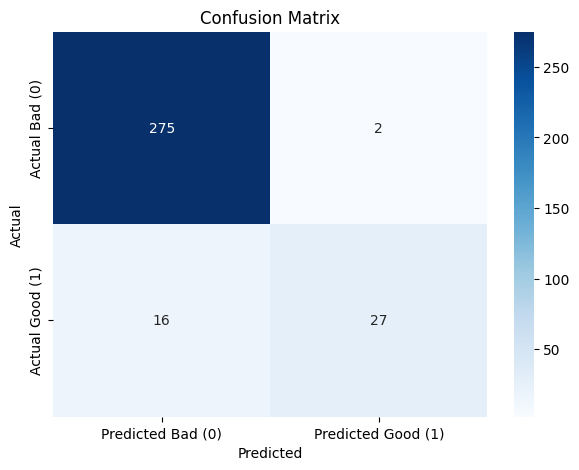


--- Classification Report ---
              precision    recall  f1-score   support

     Bad (0)       0.95      0.99      0.97       277
    Good (1)       0.93      0.63      0.75        43

    accuracy                           0.94       320
   macro avg       0.94      0.81      0.86       320
weighted avg       0.94      0.94      0.94       320



In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Accuracy ---")
print(f"Accuracy: {accuracy * 100:.2f}%")


print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Bad (0)', 'Predicted Good (1)'], 
            yticklabels=['Actual Bad (0)', 'Actual Good (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\n--- Classification Report ---")

print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))


--- Top 5 Most Important Features ---
   Importance           Feature
0    0.173743           alcohol
1    0.111262         sulphates
2    0.103162           density
3    0.102414  volatile acidity
4    0.092871       citric acid


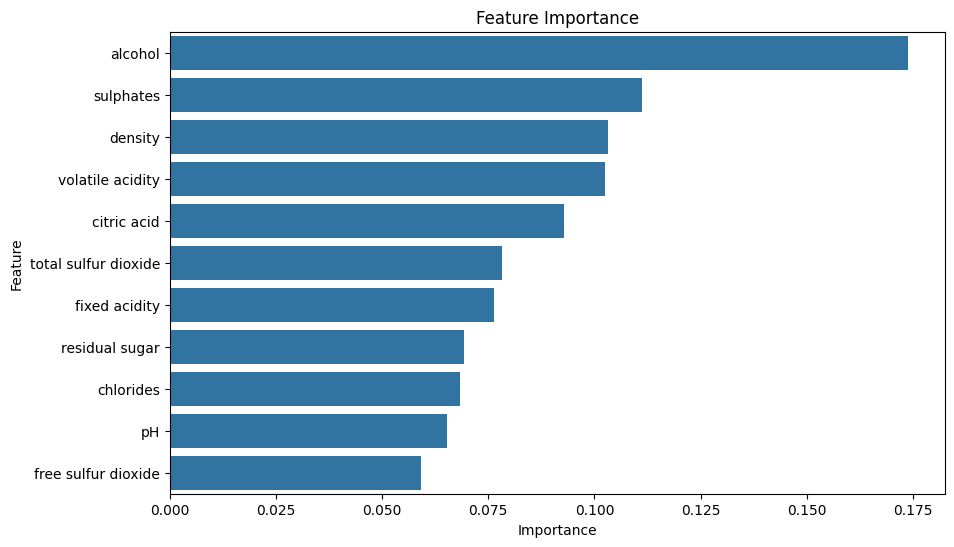

In [ ]:
importances = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(importances, X.columns), reverse=True), 
                           columns=['Importance', 'Feature'])

print("\n--- Top 5 Most Important Features ---")
print(feature_imp.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance')
plt.show()